In [ ]:
# For numeric opreations
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt

# Main deep learning library
import tensorflow as tf

# For image data augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To create sequential model
from tensorflow.keras.models import Sequential

# Import layers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D , Conv2D , MaxPooling2D , Flatten

# Different neural network layers
from tensorflow.keras.optimizers import Adam

# Callbacks for training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For download dataset from kagglehub
import kagglehub

# For handling files path
import os

In [2]:
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("umitka/chest-x-ray-balanced")

# ye syrwe ke liye hai
path = r"C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric


c:\Users\rb533\ML\chest-xray-pneumonia-detection-main\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import os
# Listing all files from main dataset
print(os.listdir(path))



# ye dysre ke liye hai
print(os.listdir(path))


['test', 'train', 'val']
['test', 'train', 'val']


In [24]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

normal_dir = r"C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\train\normal"

# Count current images
current_count = len(os.listdir(normal_dir))
target_count = 3800
images_to_generate = target_count - current_count

print("Current normal images:", current_count)
print("Images to generate:", images_to_generate)

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_files = os.listdir(normal_dir)
i = 0

while i < images_to_generate:
    img_name = np.random.choice(image_files)
    img_path = os.path.join(normal_dir, img_name)

    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    for batch in datagen.flow(
        x,
        batch_size=1,
        save_to_dir=normal_dir,
        save_prefix="aug",
        save_format="jpeg"
    ):
        i += 1
        if i >= images_to_generate:
            break

print("✅ Normal images augmentation complete!")


Current normal images: 1341
Images to generate: 2459
✅ Normal images augmentation complete!


In [25]:
from PIL import Image
import matplotlib.pyplot as plt
import os


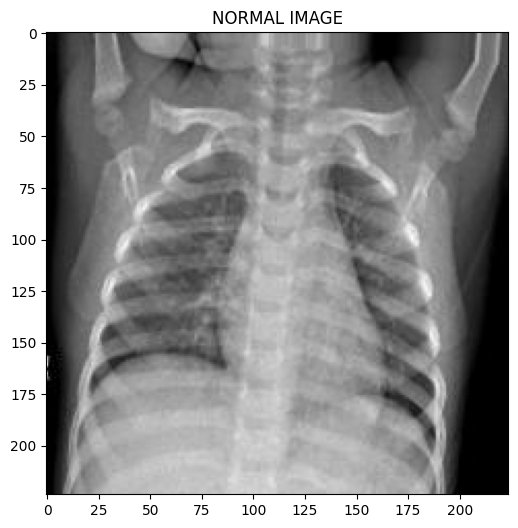

In [26]:
# Constructing the path to the folder containing normal chest x_ray images
# image_folder = os.path.join(path , "chest_xray_balanced" , "train" , "NORMAL")

# ye dusra kaggle dataset ke liye hai
image_folder = os.path.join(path , "train" , "NORMAL")  

# Selecting 8 image from the folder
image_file = os.listdir(image_folder)[7]

# Combine full path
image_path = os.path.join(image_folder , image_file)

try:

    # Opening image using PIL
    img = Image.open(image_path)

    # Show images using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img , cmap="gray")
    plt.title("NORMAL IMAGE")
    plt.axis="off"
    plt.show()

except Exception as e:
   print(f"YOU HAVE PROBLEM IN THE LOADING{e}")


In [27]:
# Display helthy and sick peoples from dataset

train_hel = os.listdir(path + "/train/NORMAL")
train_sick = os.listdir(path + "/train/PNEUMONIA")
test_hel = os.listdir(path + "/test/NORMAL")
test_sick = os.listdir(path + "/test/PNEUMONIA")
val_hel = os.listdir(path + "/val/NORMAL")
val_sick = os.listdir(path + "/val/PNEUMONIA")





print("Length of healthy peoples into train folder :....." , len(train_hel))
print("Length of unhealthy peoples into train folder :......" , len(train_sick))

print("\nLength of helthy peoples into test folder :..." , len(test_hel))
print("Length of unhelthy peoples into test folder :....." , len(test_sick))

print("\nLength of helthy peoples into val folder :...." ,len(val_hel))
print("Length of unhelthy peoples into val folder :...." , len(val_sick))

Length of healthy peoples into train folder :..... 3531
Length of unhealthy peoples into train folder :...... 3875

Length of helthy peoples into test folder :... 234
Length of unhelthy peoples into test folder :..... 390

Length of helthy peoples into val folder :.... 8
Length of unhelthy peoples into val folder :.... 8


In [28]:
from PIL import Image
# Constructing full path to the first image from normal dataset
image_path = path + "/train/NORMAL/" + os.listdir(path + "/train/NORMAL")[0]

# Open image
img = Image.open(image_path)

# Print image size
print("Image size" , img.size)

Image size (224, 224)


In [29]:
from sklearn.utils import validation

# Create an image that rescale pixels values to 0-1
data_gen = ImageDataGenerator(
                              rescale=1./255.0
                              )

In [55]:
# Normalize image pixels to range 0-1
train_data = data_gen.flow_from_directory(

                                        path + "/train",
                                        #  "C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\train"
                                         target_size=(150 , 150),
                                         batch_size = 42,
                                         class_mode = "binary"

                                         )

Found 7406 images belonging to 2 classes.


In [56]:
# Normalize image pixels to range 0-1 of testing data
test_data = data_gen.flow_from_directory(

                                         path + "/test",
                                        #  "C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\test",
                                         target_size=(150 , 150),
                                         batch_size = 42,
                                         class_mode = "binary",
                                         shuffle = False

                                         )

Found 624 images belonging to 2 classes.


In [57]:
# Normalize image pixels to range 0-1 of validation data
val_data = data_gen.flow_from_directory(
                                         path + "/val",
                                        #  "C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\val",
                                         target_size=(150 , 150),
                                         batch_size = 42,
                                         class_mode = "binary",
                                         shuffle=False

                                         )

Found 16 images belonging to 2 classes.


In [54]:
# Creating a CNN model
model = Sequential([

                    # First convolutional layer with 64 filters and kernal and relu activation
                    Conv2D(64 , (3,3) , activation="relu" , input_shape=(150 , 150 , 3)),
                    # Maxpooling2D layer to reduce spatial dimensions
                    MaxPooling2D(3,3),

                    Conv2D(128 , (3,3) , activation="relu"),
                    MaxPooling2D(3,3),

                    Conv2D(215, (3,3), activation='relu'),
                    MaxPooling2D(3,3),

                    # Flattening 3D feature maps to 1D vector
                    Flatten(),

                    # Fully connected layer
                    Dense(128 , activation = "relu"),
                    Dropout(0.5),

                    Dense(1 , activation="sigmoid")

                   ])

In [62]:
#  vgg16 model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)


In [63]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

# Compile to the model
model.compile(

              optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

# Displaying the summary of model architecture
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [64]:
# early_stop = EarlyStopping(verbose=1 , monitor="val_loss" , patience=2)


# Train model on training data
history = model.fit(

                    train_data,
                    validation_data=test_data,

                    epochs=15,
                    verbose=1  ,
                    # callbacks=[early_stop],

                    )

Epoch 1/15
177/177 [==============================] - 209s 1s/step - loss: 0.1235 - accuracy: 0.9496 - precision_5: 0.9525 - recall_5: 0.9512 - auc_5: 0.9901 - val_loss: 0.8418 - val_accuracy: 0.7452 - val_precision_5: 0.7112 - val_recall_5: 0.9974 - val_auc_5: 0.9223
Epoch 2/15
177/177 [==============================] - 197s 1s/step - loss: 0.0657 - accuracy: 0.9756 - precision_5: 0.9746 - recall_5: 0.9788 - auc_5: 0.9970 - val_loss: 0.5540 - val_accuracy: 0.8205 - val_precision_5: 0.7814 - val_recall_5: 0.9897 - val_auc_5: 0.9339
Epoch 3/15
177/177 [==============================] - 194s 1s/step - loss: 0.0573 - accuracy: 0.9781 - precision_5: 0.9786 - recall_5: 0.9796 - auc_5: 0.9975 - val_loss: 0.9181 - val_accuracy: 0.7644 - val_precision_5: 0.7280 - val_recall_5: 0.9949 - val_auc_5: 0.9021
Epoch 4/15
177/177 [==============================] - 194s 1s/step - loss: 0.0470 - accuracy: 0.9819 - precision_5: 0.9822 - recall_5: 0.9832 - auc_5: 0.9985 - val_loss: 0.9340 - val_accuracy: 

In [ ]:
# Evaluate model on testdata data
test_loss , test_acc , test_prec, test_rec,test_auc = model.evaluate(test_data)

# Print model accuracy
print("Accuracy" , test_acc)
print("Precision" , test_prec)
print("Recall" , test_rec)
print("AUC" , test_auc)

# Print model loss
print("Loss" , test_loss)

In [ ]:
test_data.reset()

In [44]:
from sklearn.metrics import classification_report , confusion_matrix

# Numbers of steps convert all test images based on the batch size
STEPS = test_data.n // test_data.batch_size + 1

# Predicting raw probabilities for all test images
Y_pred_raw = model.predict(test_data, steps=STEPS)

# Converting probabilities to binary label using 0.6 threshold
Y_pred = (Y_pred_raw > 0.6).astype(int)

# Getting true label from the test data
Y_true = test_data.classes[:len(Y_pred)]

# Showing classification report
print("Classification Report" , classification_report(Y_true , Y_pred , target_names=["NORMAL", "PNEUMONIA"]))

# Showing confusion metrix
print("\nConfusion Matrix" , confusion_matrix(Y_true , Y_pred))

15/15 [==============================] - 6s 360ms/step
Classification Report               precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624


Confusion Matrix [[234   0]
 [390   0]]


c:\Users\rb533\ML\chest-xray-pneumonia-detection-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rb533\ML\chest-xray-pneumonia-detection-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rb533\ML\chest-xray-pneumonia-detection-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [ ]:
import tensorflow as tf

# Set model name
MODEL_FILENAME = "kaggle_xray_model2.keras"

# Saving model
model.save(MODEL_FILENAME)
model.save("kaggle_xray_model2.h5")

print("\nYou model save succesfully.....{MODEL_FILENAME}")